Optimal number of clusters for Iris dataset: 10
Optimal number of clusters for Artificial dataset: 2


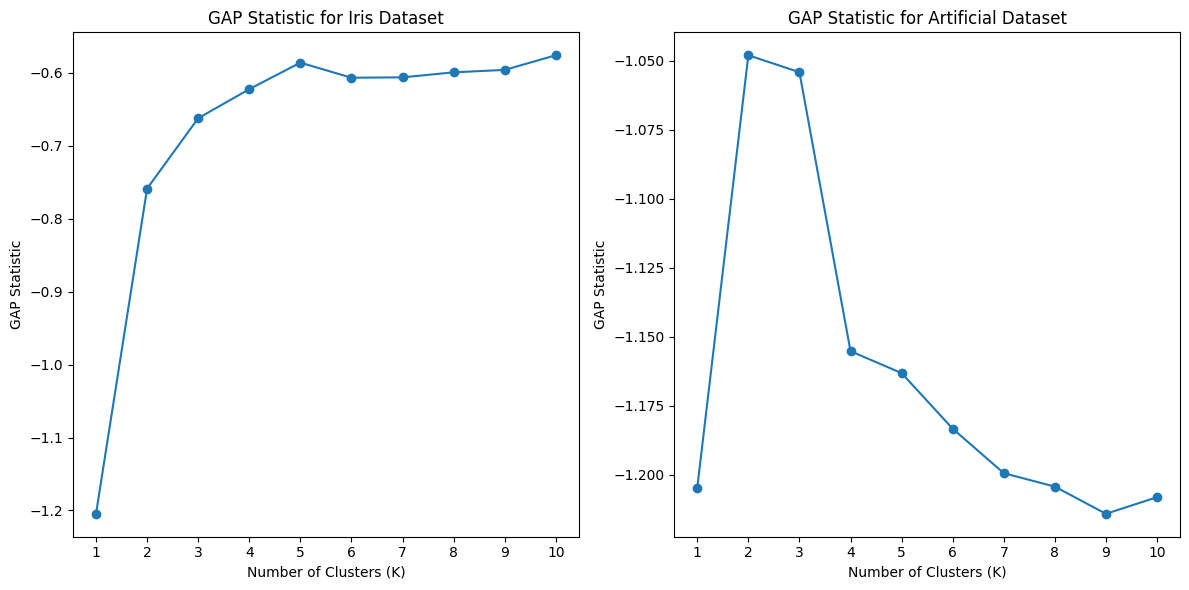

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random as rand

rand.seed(123)

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data

# Load the artificial dataset (replace with your actual path)
data2024b = pd.read_csv('data2024b.csv')  # Make sure this CSV file has columns V1 and V2
data2024b_values = data2024b[['V1', 'V2']].values

# Function to compute the GAP statistic for hierarchical clustering
def gap_statistic(data, k_range, n_refs=10):
    # Calculate the log of within-cluster dispersion for observed data
    hierarchical_results = []
    for k in k_range:
        hierarchical = AgglomerativeClustering(n_clusters=k)
        labels = hierarchical.fit_predict(data)
        # Compute dispersion as the sum of distances within each cluster
        dispersion = sum([np.sum(np.linalg.norm(data[labels == i] - data[labels == i].mean(axis=0), axis=1)) for i in range(k)])
        hierarchical_results.append(dispersion)

    # Create reference data
    refs = np.random.rand(n_refs, data.shape[0], data.shape[1])
    ref_dispersions = np.zeros((n_refs, len(k_range)))

    for i in range(n_refs):
        for j, k in enumerate(k_range):
            hierarchical = AgglomerativeClustering(n_clusters=k)
            labels = hierarchical.fit_predict(refs[i])
            # Compute dispersion for reference
            ref_dispersions[i, j] = sum([np.sum(np.linalg.norm(refs[i][labels == l] - refs[i][labels == l].mean(axis=0), axis=1)) for l in range(k)])

    # Calculate the GAP statistic
    gap = np.mean(np.log(ref_dispersions), axis=0) - np.log(hierarchical_results)
    return gap, hierarchical_results

# Normalize the datasets
scaler = StandardScaler()
iris_data_std = scaler.fit_transform(iris_data)
data2024b_std = scaler.fit_transform(data2024b_values)

# Define range of K values
k_range = range(1, 11)

# Compute GAP statistics for Iris dataset
gap_iris, hierarchical_results_iris = gap_statistic(iris_data_std, k_range)

# Compute GAP statistics for artificial dataset
gap_artificial, hierarchical_results_artificial = gap_statistic(data2024b_std, k_range)

# Identify optimal number of clusters based on the GAP statistic
optimal_k_iris = np.argmax(gap_iris) + 1
optimal_k_artificial = np.argmax(gap_artificial) + 1

# Print the optimal number of clusters
print(f'Optimal number of clusters for Iris dataset: {optimal_k_iris}')
print(f'Optimal number of clusters for Artificial dataset: {optimal_k_artificial}')

# Optionally, you can plot the GAP statistics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, gap_iris, marker='o')
plt.title('GAP Statistic for Iris Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('GAP Statistic')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, gap_artificial, marker='o')
plt.title('GAP Statistic for Artificial Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('GAP Statistic')
plt.xticks(k_range)

plt.tight_layout()
plt.show()


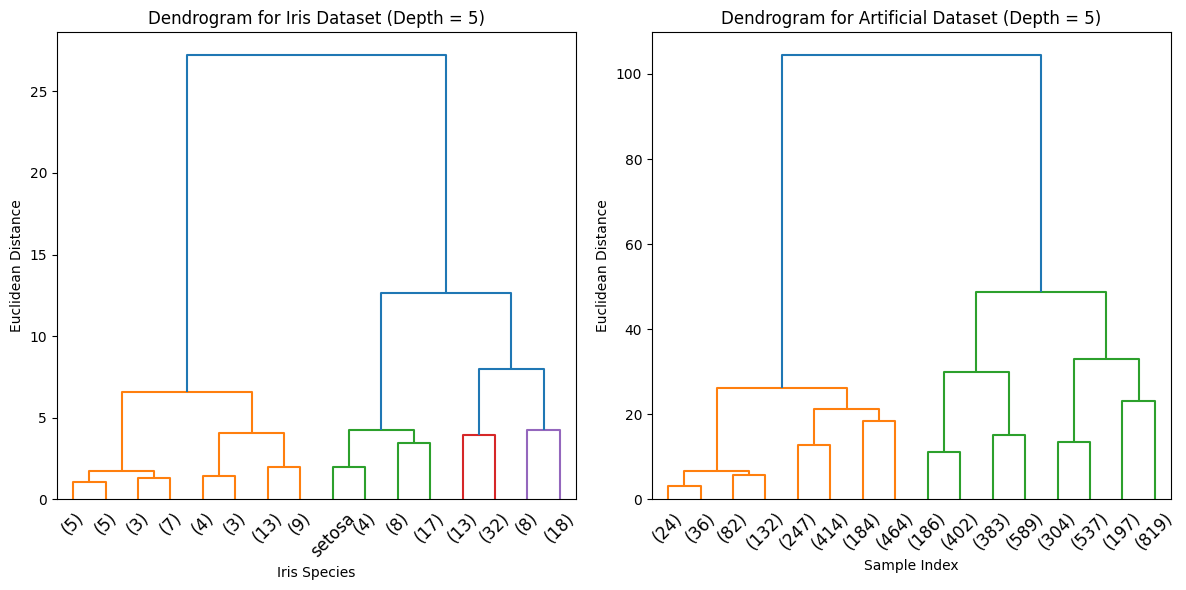

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data

# Load the artificial dataset (replace with your actual path)
data2024b = pd.read_csv('data2024b.csv')  # Make sure this CSV file has columns V1 and V2
data2024b_values = data2024b[['V1', 'V2']].values

# Normalize the datasets
scaler = StandardScaler()
iris_data_std = scaler.fit_transform(iris_data)
data2024b_std = scaler.fit_transform(data2024b_values)

# Create linkage matrices for hierarchical clustering
linkage_iris = sch.linkage(iris_data_std, method='ward')
linkage_artificial = sch.linkage(data2024b_std, method='ward')

# Set a threshold for cutting the dendrogram (you can adjust this value as needed)
color_threshold = 5  # You can set this to your desired threshold

# Plotting the dendrogram for Iris dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sch.dendrogram(linkage_iris, labels=iris.target_names[iris.target], truncate_mode='level', p=3, color_threshold=7, leaf_rotation=45)
plt.title('Dendrogram for Iris Dataset (Stopping at 4 Clusters)')
plt.xlabel('Iris Species')
plt.ylabel('Euclidean Distance')

# Plotting the dendrogram for Artificial dataset
plt.subplot(1, 2, 2)
sch.dendrogram(linkage_artificial, truncate_mode='level', leaf_rotation=45, p=3, color_threshold=50)
plt.title('Dendrogram for Artificial Dataset (Stopping at 2 Clusters)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()
